# Analysis of the Chronic lymphocytic leukemia (CLL) 


The CLL RNA-Seq data was obtained from a study published by Ferreira et al. in 2014 [1]. This study included a deep RNA sequencing in different subpopulations of B-lymphocytes from healthy individuals and CLL cells from a cohort of 98 patients and characterized the CLL transcriptional landscape with unprecedented resolution. The transcriptomic architecture of CLL uncovered here refines the biological characterization of the disease and opens new perspectives for the clinical management of patients. 

The data is deposited on the European Genome-Phenome Archive (EGA, http://www.ebi.ac.uk/ega) under the study ID EGAS00001000374. The study is comprised of 98 CLL samples and 9 normal samples (each normal samples has three replicates).  

We selected 97 CLL samples from the dataset EGAD00001000258. One of the samples (EGAR00001072814) was not labbeled with the mutation state, therefore we decided not to use this sample in our study.  

We included in this repository a TSV file with the name of the samples and its classification. The access to the raw data should be requested to the EGA archive. The raw file names should be transformed to the one used in this study to use this set of scripts and code.

### References

1.	Ferreira PG, Jares P, Rico D, Gómez-López G, Martínez-Trillos A, Villamor N, Ecker S, González-Pérez A, Knowles DG, Monlong J et al: Transcriptome characterization by RNA sequencing identifies a major molecular and clinical subdivision in chronic lymphocytic leukemia. Genome Res 2014, 24(2):212-226.



In [1]:
# Set the environment variables to be used during the project 

import os
import pandas
import math
import numpy as np
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec

from six.moves import cPickle as pickle
from pandas import read_csv

###############################################################
#
#    Update this path
#
###############################################################
os.environ['WORKDIR'] = os.path.abspath('/panfs/pan1.be-md.ncbi.nlm.nih.gov/alt_splicing/bioNotebook-DiffExpIR')
###############################################################

os.environ['CONFIG'] = os.environ['WORKDIR'] + '/config'
os.environ['DATA'] = os.environ['WORKDIR'] + '/data'
os.environ['BIN'] = os.environ['WORKDIR'] + '/bin'
os.environ['RESULTS'] = os.environ['WORKDIR'] + '/results'
os.environ['DOC'] = os.environ['WORKDIR'] + '/docs'
os.environ['SRC'] = os.environ['WORKDIR'] + '/src'

os.environ['DATADIR'] = 'CLL_EGAS00001000374'

### Creating result folder

In [2]:
%%bash
cd ${RESULTS}
if [ ! -e ${DATADIR} ]
then
    mkdir ${DATADIR}
fi

### Submitting the alignments to the SGE cluster

In [3]:
%%bash
cd ${RESULTS}/${DATADIR}
if [ ! -e "STAR_hg19_Human" ]
then
    mkdir STAR_hg19_Human
    cd STAR_hg19_Human
    for f in ${DATA}/${DATADIR}/*_1.fastq.gz
    do
        n=`basename $f`
        n=${n%_1.fastq.gz}
        qsub -v SGE_FACILITIES -l h_rt=86400,h_vmem=32G -N ${n} -o ${n}.out -e ${n}.err -pe multicore 16 -m n $BIN/star.sh ${n} $DATA/${DATADIR} $DATA/hg19/Sequence/STAR
    done
fi

Your job 6421672 ("EGAR00001072723_CLL250909_7") has been submitted
Your job 6421673 ("EGAR00001072724_CLL280809_7") has been submitted
Your job 6421674 ("EGAR00001072725_C0EWEACXX_3_19") has been submitted
Your job 6421675 ("EGAR00001072726_D030UACXX_7_1") has been submitted
Your job 6421677 ("EGAR00001072727_62JP4AAXX_1") has been submitted
Your job 6421678 ("EGAR00001072728_D0933ACXX_2_2") has been submitted
Your job 6421679 ("EGAR00001072729_62JP4AAXX_8") has been submitted
Your job 6421680 ("EGAR00001072730_626WGAAXX_1") has been submitted
Your job 6421682 ("EGAR00001072731_626WGAAXX_2") has been submitted
Your job 6421683 ("EGAR00001072732_626WGAAXX_3") has been submitted
Your job 6421684 ("EGAR00001072733_626WGAAXX_4") has been submitted
Your job 6421685 ("EGAR00001072734_62JP4AAXX_2") has been submitted
Your job 6421687 ("EGAR00001072735_626WGAAXX_7") has been submitted
Your job 6421689 ("EGAR00001072736_626WGAAXX_8") has been submitted
Your job 6421690 ("EGAR00001072737_627LPA

### Submitting the TPMCalculator to the SGE cluster

In [4]:
%%bash
cd ${RESULTS}/${DATADIR}
if [ ! -e "STAR_hg19_Human_TPM" ]
then
    mkdir STAR_hg19_Human_TPM
    cd STAR_hg19_Human_TPM
    for f in ${RESULTS}/${DATADIR}/STAR_hg19_Human/*.bam
    do
        n=`basename $f`
        qsub -v SGE_FACILITIES -l h_rt=86400,h_vmem=8G -N ${n%_sorted.bam} -o ${n%_sorted.bam}.out -e ${n%_sorted.bam}.err -m n -b y $BIN/TPMCalculator -g $DATA/hg19/Annotation/Genes/genes.gtf -b $f -p
    done
fi

Your job 6424335 ("EGAR00001072723_CLL250909_7") has been submitted
Your job 6424337 ("EGAR00001072724_CLL280809_7") has been submitted
Your job 6424339 ("EGAR00001072725_C0EWEACXX_3_19") has been submitted
Your job 6424341 ("EGAR00001072726_D030UACXX_7_1") has been submitted
Your job 6424342 ("EGAR00001072727_62JP4AAXX_1") has been submitted
Your job 6424343 ("EGAR00001072728_D0933ACXX_2_2") has been submitted
Your job 6424345 ("EGAR00001072729_62JP4AAXX_8") has been submitted
Your job 6424346 ("EGAR00001072730_626WGAAXX_1") has been submitted
Your job 6424347 ("EGAR00001072731_626WGAAXX_2") has been submitted
Your job 6424349 ("EGAR00001072732_626WGAAXX_3") has been submitted
Your job 6424350 ("EGAR00001072733_626WGAAXX_4") has been submitted
Your job 6424351 ("EGAR00001072734_62JP4AAXX_2") has been submitted
Your job 6424353 ("EGAR00001072735_626WGAAXX_7") has been submitted
Your job 6424354 ("EGAR00001072736_626WGAAXX_8") has been submitted
Your job 6424355 ("EGAR00001072737_627LPA

### Loading sample description data

In [2]:
cll_samples = pandas.read_csv(os.path.join(os.environ['DATA'], os.environ['DATADIR'], 'cll_samples.tsv'), sep='\t')
cll_samples.head()

,ECGA_ID,Mut_Stat
0,EGAR00001072723,UNM
1,EGAR00001072724,UNM
2,EGAR00001072725,MUT
3,EGAR00001072726,MUT
4,EGAR00001072727,UNM


### Python functions to process the data

#### Function to parser the TPMCalculator data files

In [3]:
def extract_data(ctrl_dir, ctl_samples, treat_dir, treat_samples):
    samples = {}
    for file in ctl_samples:
        print("Parsing file %s" % os.path.join(ctrl_dir, file))
        data = pandas.read_csv(os.path.join(ctrl_dir, file), sep='\t')
        for chr in data.Chr.unique():
            if '_' not in chr:
                if chr not in samples:
                    samples[chr] = {}
                for g in data.loc[data['Chr'] == chr, 'Gene_Id'].unique():
                    if g not in samples[chr]:
                        samples[chr][g] = {}
        for index, row in data.iterrows():
            chr = row['Chr']
            if '_' not in chr:
                g = row['Gene_Id']
                c = int(row['Type_Number'])
                start = int(row['start']) + 1
                end = int(row['end']) + 1
                if c not in samples[chr][g]:
                    samples[chr][g][c] = {'type': row['Type'], 'start': start, 'end': end,
                                          'TPM_list_ctrl': [], 'Reads_list_ctrl': [], 'TPM_ctrl': 0,
                                          'Reads_ctrl': 0,
                                          'TPM_list_treat': [], 'Reads_list_treat': [], 'TPM_treat': 0,
                                          'Reads_treat': 0}
                tpm = float(row['TPM'])
                if tpm < 10E-5:
                    tpm = 10E-5
                samples[chr][g][c]['TPM_list_ctrl'].append(tpm)
                samples[chr][g][c]['Reads_list_ctrl'].append(int(row['Count_Reads']))
                samples[chr][g][c]['TPM_ctrl'] = np.mean(samples[chr][g][c]['TPM_list_ctrl'])
                samples[chr][g][c]['Reads_ctrl'] = np.mean(samples[chr][g][c]['Reads_list_ctrl'])
    for file in treat_samples:
        print("Parsing file %s" % os.path.join(treat_dir, file))
        data = pandas.read_csv(os.path.join(treat_dir, file), sep='\t')
        for chr in data.Chr.unique():
            if '_' not in chr:
                if chr not in samples:
                    samples[chr] = {}
                for g in data.loc[data['Chr'] == chr, 'Gene_Id'].unique():
                    if g not in samples[chr]:
                        samples[chr][g] = {}
        for index, row in data.iterrows():
            chr = row['Chr']
            if '_' not in chr:
                g = row['Gene_Id']
                c = int(row['Type_Number'])
                start = int(row['start']) + 1
                end = int(row['end']) + 1
                if c not in samples[chr][g]:
                    samples[chr][g][c] = {'type': row['Type'], 'start': start, 'end': end,
                                          'TPM_list_ctrl': [], 'Reads_list_ctrl': [], 'TPM_ctrl': 0,
                                          'Reads_ctrl': 0,
                                          'TPM_list_treat': [], 'Reads_list_treat': [], 'TPM_treat': 0,
                                          'Reads_treat': 0}
                tpm = float(row['TPM'])
                if tpm < 10E-5:
                    tpm = 10E-5
                samples[chr][g][c]['TPM_list_treat'].append(tpm)
                samples[chr][g][c]['Reads_list_treat'].append(int(row['Count_Reads']))
                samples[chr][g][c]['TPM_treat'] = np.mean(samples[chr][g][c]['TPM_list_treat'])
                samples[chr][g][c]['Reads_treat'] = np.mean(samples[chr][g][c]['Reads_list_treat'])
    return samples

### Creating a list of samples

In [4]:
os.chdir(os.environ['RESULTS'] + '/' + os.environ['DATADIR'] + '/STAR_hg19_Human_TPM')
samples = {'ctrl' : [], 'cll':[]}
files = [name for root, dirs, files in os.walk('./') for name in files if name.endswith("_genes.ent")]
for f in files:
    n = f.split('_')[0]
    row = cll_samples.loc[cll_samples['ECGA_ID'] == n]
    if row.values[0][1] == 'NBC':
        samples['ctrl'].append(f)
    else:
        samples['cll'].append(f)

### Creating a pickle file to store the Python objects used by the DiffExpIR algorithm

In [5]:
os.chdir(os.environ['RESULTS'] + '/' + os.environ['DATADIR'] + '/STAR_hg19_Human_TPM')
pickle_file = 'samples_data.pickle'
if not os.path.exists(pickle_file):    
    try:
        samples_data = extract_data('./', samples['ctrl'], './', samples['cll'])
        print('Pickling ...')    
        with open(pickle_file, 'wb') as f:
            pickle.dump(samples_data, f, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
else:
    try:
        print('Reading data for the ttest')
        with open(pickle_file, 'rb') as f:
            s_data_ttest = pickle.load(f)
        print('Reading data for the Mann Whitney')
        with open(pickle_file, 'rb') as f:
            s_data_mannwhitneyu = pickle.load(f)
        print('Reading data for the ttest with log values')
        with open(pickle_file, 'rb') as f:
            s_data_ttest_log = pickle.load(f)
        print('Reading data for the Mann Whitney with log values')
        with open(pickle_file, 'rb') as f:
            s_data_mannwhitneyu_log = pickle.load(f)
    except Exception as e:
        print('Unable to process data from', pickle_file, ':', e)
        raise

Reading data for the ttest
Reading data for the Mann Whitney
Reading data for the ttest with log values
Reading data for the Mann Whitney with log values


### Function to process one intron in a gene

This function executes a T-Test (method = 'ttest') or a Mann-Whitney rank test (method = 'mannwhitneyu') function to calculate the P-Value associated to the comparison among the control and treated samples. 

Then, the r values, $r = log_{2}\lgroup\frac{TPM^{intron}_i}{(TPM^{exon}_{i-1} + TPM^{exon}_{i+1})}\rgroup$, is calculated.

This function returns for the intron: PValue, $-1.0 * log_{10}(PValue)$, $r_{ctrl}$, $r_{treat}$, $log_{2}\lgroup\frac{TPM^{intron}_{treat}}{TPM^{intron}_{ctrl}}\rgroup$

In [6]:
def process_one(chr, g, a, samples, method, useLog10 = False):
    equal_var = False
    if len(samples[chr][g][a]['TPM_list_treat']) == len(samples[chr][g][a]['TPM_list_ctrl']):
        equal_var = True
    treat = []
    ctrl = []
    if useLog10:
        for i in samples[chr][g][a]['TPM_list_treat']:            
            treat.append(math.log10(i))
        for i in samples[chr][g][a]['TPM_list_ctrl']:
            ctrl.append(math.log10(i))
    else:
        treat = samples[chr][g][a]['TPM_list_treat']
        ctrl = samples[chr][g][a]['TPM_list_ctrl']
    if method == 'ttest':
        t, p = stats.ttest_ind(treat, ctrl, equal_var=equal_var)
    elif method == 'mannwhitneyu':
        t, p = stats.mannwhitneyu(treat, ctrl)
    else:
        print('Error. Method should be ttest or mannwhitneyu')
        return
    c = a - 1
    e11 = 0.0
    e21 = 0.0
    e12 = 0.0
    e22 = 0.0
    while c != 0:
        if samples[chr][g][c]['type'] == 'exon':
            e11 = samples[chr][g][c]['TPM_ctrl']
            e21 = samples[chr][g][c]['TPM_treat']
            break
        c -= 1
    c = a + 1
    while c < len(samples[chr][g]):
        if samples[chr][g][c]['type'] == 'exon':
            e12 = samples[chr][g][c]['TPM_ctrl']
            e22 = samples[chr][g][c]['TPM_treat']
            break
        c += 1
    samples[chr][g][a]['p'] = p
    minuslog10p = -1.0 * math.log10(p)
    r1 = math.log2(samples[chr][g][a]['TPM_ctrl'] / (e11 + e12))
    r2 = math.log2(samples[chr][g][a]['TPM_treat'] / (e21 + e22))    
    log2TPMRatio = math.log2(samples[chr][g][a]['TPM_treat']/samples[chr][g][a]['TPM_ctrl'])
    return p, minuslog10p, r1, r2, log2TPMRatio

### Function to process all data

This function process all genes with all introns. The results are inserted into the "samples" dictionary.

In [7]:
def process_sample(samples, method, useLog10 = False):   
    count = 0
    for chr in samples:
        for g in samples[chr]:
            for a in samples[chr][g]:
                if samples[chr][g][a]['type'] == 'intron':
                    try:
                        p, minuslog10p, r1, r2, log2TPMRatio = process_one(chr, g, a, samples, method, useLog10)
                        samples[chr][g][a]['p'] = p
                        samples[chr][g][a]['minuslog10p'] = minuslog10p
                        samples[chr][g][a]['r1'] = r1
                        samples[chr][g][a]['r2'] = r2
                        samples[chr][g][a]['log2TPMRatio'] = log2TPMRatio
                    except:
                        pass
    return samples

### Function to create the arrays to be ploted with colors

This function return tree arrays x, y, c. The arrays x and y are the points to be plotted. x is $log_{2}\lgroup\frac{TPM^{intron}_{treat}}{TPM^{intron}_{ctrl}}\rgroup$ and y is $-1.0 * log_{10}(PValue)$. c is an array of colors with red for statistically relevant points and black for the non relevants.

In [8]:
def process_plot(samples, r, p):
    x_intron = []
    y_intron = []
    c_intron = []
    for chr in samples:
        for g in samples[chr]:
            for a in samples[chr][g]:
                if samples[chr][g][a]['type'] == 'intron' and 'r1' in samples[chr][g][a]:
                    if samples[chr][g][a]['r1'] > r or samples[chr][g][a]['r2'] > r:
                        y_intron.append(samples[chr][g][a]['minuslog10p'])
                        x_intron.append(samples[chr][g][a]['log2TPMRatio'])
                        if abs(samples[chr][g][a]['log2TPMRatio']) > 2 and samples[chr][g][a]['p'] < p:
                            c_intron.append('red')
                        else:
                            c_intron.append('black')                    
    return x_intron, y_intron, c_intron    

### Printing the selected data

In [9]:
def print_process_plot(samples, r, p, filename):
    count = 0
    with open(filename, 'w') as f_out:
        for chr in samples:
            for g in samples[chr]:
                for a in samples[chr][g]:
                    if samples[chr][g][a]['type'] == 'intron' and 'minuslog10p' in samples[chr][g][a]:
                        if abs(samples[chr][g][a]['log2TPMRatio']) > 2 and samples[chr][g][a]['p'] < p and (samples[chr][g][a]['r1'] > r or samples[chr][g][a]['r2'] > r):
                            count += 1
                            f_out.write(
                                g + '\t' 
                                + chr + ':' + str(samples[chr][g][a]['start']) + '-' + str(samples[chr][g][a]['end'])
                                + '\t' + str(samples[chr][g][a]['p'])
                                + '\t' + str(samples[chr][g][a]['minuslog10p'])
                                + '\t' + str(samples[chr][g][a]['TPM_ctrl'])
                                + '\t' + str(samples[chr][g][a]['TPM_treat'])                            
                                + '\t' + str(samples[chr][g][a]['log2TPMRatio'])
                                + '\t' + str(samples[chr][g][a]['r1'])
                                + '\t' + str(samples[chr][g][a]['r2'])
                                + '\n')
    return count

### Processing data with the Ttest

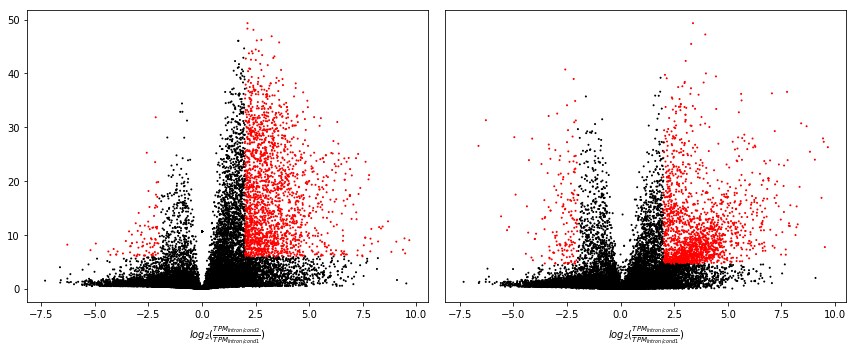

In [10]:
plt.figure(figsize=(12, 5)) 
gs = gridspec.GridSpec(1, 2) 

plt.subplot(gs[0])
s_data_ttest = process_sample(s_data_ttest, 'ttest')
count = print_process_plot(s_data_ttest, -1.0, 1E-6, 'diff_exp_intron_retained_ttest.txt')
x_intron, y_intron, c_intron = process_plot(s_data_ttest, -1.0, 1E-6)
plt.xlabel(r'$log_{2}(\frac{TPM_{Intron/cond2}}{TPM_{Intron/cond1}})$')
plt.scatter(x_intron, y_intron, s=1, c=c_intron)

plt.subplot(gs[1])
s_data_ttest_log = process_sample(s_data_ttest_log, 'ttest', True)
count = print_process_plot(s_data_ttest_log, -1.0, 1E-6, 'diff_exp_intron_retained_ttest_log10.txt')
x_intron, y_intron, c_intron = process_plot(s_data_ttest_log, -1.0, 1E-6)
plt.yticks([])
plt.xlabel(r'$log_{2}(\frac{TPM_{Intron/cond2}}{TPM_{Intron/cond1}})$')
plt.scatter(x_intron, y_intron, s=1, c=c_intron)

plt.tight_layout()
plt.show()

### Processing data with the Mann-Whitney rank test

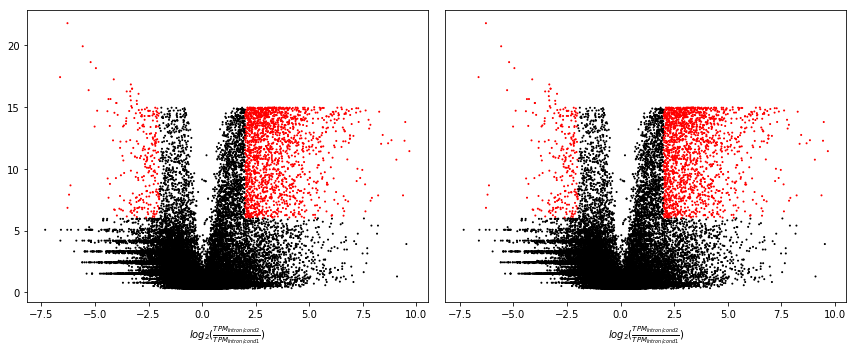

In [11]:
plt.figure(figsize=(12, 5)) 
gs = gridspec.GridSpec(1, 2) 

plt.subplot(gs[0])
s_data_mannwhitneyu = process_sample(s_data_mannwhitneyu, 'mannwhitneyu')
count = print_process_plot(s_data_mannwhitneyu, -1.0, 1E-6, 'diff_exp_intron_retained_mannwhitneyu.txt')
x_intron, y_intron, c_intron = process_plot(s_data_mannwhitneyu, -1.0, 1E-6)
plt.xlabel(r'$log_{2}(\frac{TPM_{Intron/cond2}}{TPM_{Intron/cond1}})$')
plt.scatter(x_intron, y_intron, s=1, c=c_intron)

plt.subplot(gs[1])
s_data_mannwhitneyu_log = process_sample(s_data_mannwhitneyu_log, 'mannwhitneyu', True)
count = print_process_plot(s_data_mannwhitneyu_log, -1.0, 1E-6, 'diff_exp_intron_retained_mannwhitneyu_log10.txt')
x_intron, y_intron, c_intron = process_plot(s_data_mannwhitneyu_log, -1.0, 1E-6)
plt.yticks([])
plt.xlabel(r'$log_{2}(\frac{TPM_{Intron/cond2}}{TPM_{Intron/cond1}})$')
plt.scatter(x_intron, y_intron, s=1, c=c_intron)

plt.tight_layout()
plt.show()